# Task 2

### Create Dataset & Visualization

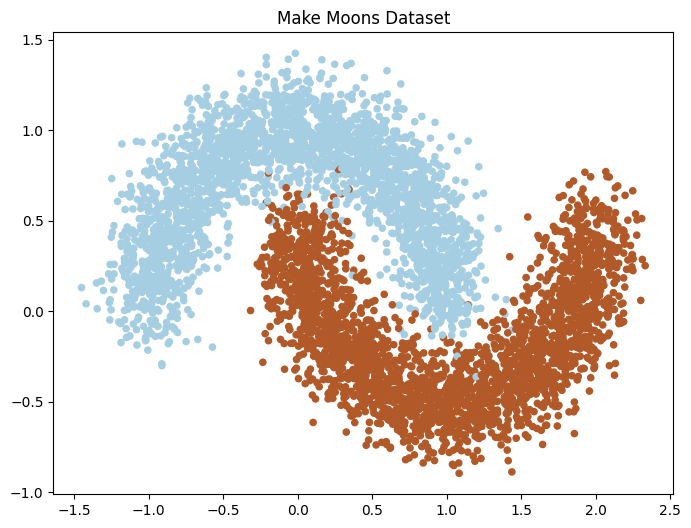

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=5000, noise=0.15, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.title("Make Moons Dataset")
plt.show()


### Train Pytorch_MLP

Epoch [0/1001], Loss: 0.7160, Test Accuracy: 0.3790
Epoch [10/1001], Loss: 0.6926, Test Accuracy: 0.5460
Epoch [20/1001], Loss: 0.6714, Test Accuracy: 0.5870
Epoch [30/1001], Loss: 0.6520, Test Accuracy: 0.7910
Epoch [40/1001], Loss: 0.6342, Test Accuracy: 0.8710
Epoch [50/1001], Loss: 0.6177, Test Accuracy: 0.8760
Epoch [60/1001], Loss: 0.6023, Test Accuracy: 0.8700
Epoch [70/1001], Loss: 0.5881, Test Accuracy: 0.8610
Epoch [80/1001], Loss: 0.5747, Test Accuracy: 0.8520
Epoch [90/1001], Loss: 0.5622, Test Accuracy: 0.8480
Epoch [100/1001], Loss: 0.5505, Test Accuracy: 0.8430
Epoch [110/1001], Loss: 0.5394, Test Accuracy: 0.8410
Epoch [120/1001], Loss: 0.5290, Test Accuracy: 0.8380
Epoch [130/1001], Loss: 0.5191, Test Accuracy: 0.8350
Epoch [140/1001], Loss: 0.5097, Test Accuracy: 0.8340
Epoch [150/1001], Loss: 0.5008, Test Accuracy: 0.8340
Epoch [160/1001], Loss: 0.4924, Test Accuracy: 0.8320
Epoch [170/1001], Loss: 0.4844, Test Accuracy: 0.8320
Epoch [180/1001], Loss: 0.4767, Test Ac

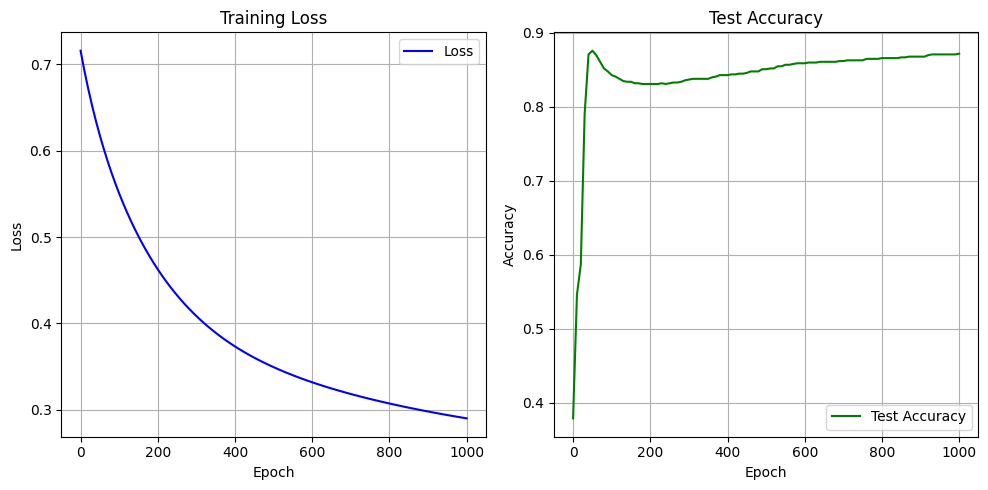

In [8]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import torch
import torch.nn as nn
import torch.optim as optim
from pytorch_mlp import MLP


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Default constants
DNN_HIDDEN_UNITS_DEFAULT = [20]
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1001
EVAL_FREQ_DEFAULT = 10

FLAGS = None

def accuracy(predictions, targets):
    pred = torch.argmax(predictions, dim=-1)
    correct = (pred == targets).sum().item()
    
    return correct / targets.size(0)

def train():
    model = MLP(n_inputs=2, n_hidden=DNN_HIDDEN_UNITS_DEFAULT, n_classes=2)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE_DEFAULT)

    log_epochs = []
    log_loss = []
    log_accuracy = []

    for epoch in range(MAX_EPOCHS_DEFAULT):
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % EVAL_FREQ_DEFAULT == 0:
            with torch.no_grad():
                test_outputs = model(X_test_tensor)
                test_acc = accuracy(test_outputs, y_test_tensor)
                log_epochs.append(epoch)
                log_loss.append(loss.item())
                log_accuracy.append(test_acc)
                print(f"Epoch [{epoch}/{MAX_EPOCHS_DEFAULT}], Loss: {loss.item():.4f}, Test Accuracy: {test_acc:.4f}")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(log_epochs, log_loss, label='Loss', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(log_epochs, log_accuracy, label='Test Accuracy', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Test Accuracy')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

train()

### Train Numpy_MLP

Step: 0, Train Loss: 0.6932, Train Accuracy: 49.40%, Test Loss: 0.6932, Test Accuracy: 37.70%
Step: 10, Train Loss: 0.6931, Train Accuracy: 50.60%, Test Loss: 0.6932, Test Accuracy: 47.60%
Step: 20, Train Loss: 0.6931, Train Accuracy: 50.60%, Test Loss: 0.6931, Test Accuracy: 47.60%
Step: 30, Train Loss: 0.6930, Train Accuracy: 50.60%, Test Loss: 0.6931, Test Accuracy: 47.60%
Step: 40, Train Loss: 0.6930, Train Accuracy: 50.60%, Test Loss: 0.6931, Test Accuracy: 47.60%
Step: 50, Train Loss: 0.6930, Train Accuracy: 50.60%, Test Loss: 0.6931, Test Accuracy: 47.60%
Step: 60, Train Loss: 0.6929, Train Accuracy: 50.60%, Test Loss: 0.6931, Test Accuracy: 47.60%
Step: 70, Train Loss: 0.6929, Train Accuracy: 50.60%, Test Loss: 0.6931, Test Accuracy: 47.60%
Step: 80, Train Loss: 0.6928, Train Accuracy: 50.60%, Test Loss: 0.6931, Test Accuracy: 47.60%
Step: 90, Train Loss: 0.6928, Train Accuracy: 50.60%, Test Loss: 0.6930, Test Accuracy: 47.60%
Step: 100, Train Loss: 0.6928, Train Accuracy: 50.6

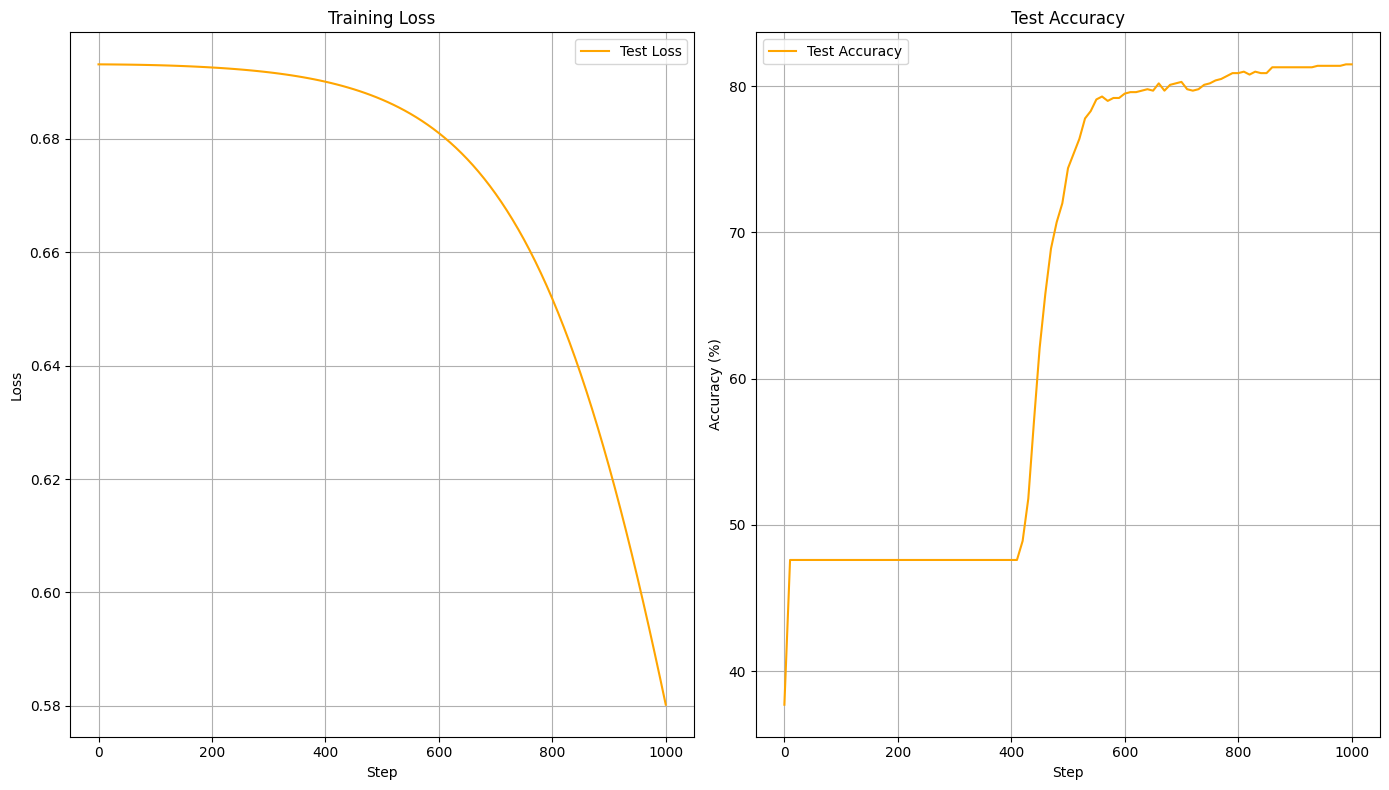

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from mlp_numpy import MLP 
from modules import CrossEntropy, Linear
import csv


DNN_HIDDEN_UNITS_DEFAULT = [20]
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1001
EVAL_FREQ_DEFAULT = 10

def accuracy(predictions, targets):
    predicted_classes = np.argmax(predictions, axis=1)
    correct_predictions = np.sum(predicted_classes == targets)
    return (correct_predictions / len(targets)) * 100

def train(dnn_hidden_units, learning_rate, max_steps, eval_freq):
    log_epochs = []
    log_loss = []
    log_accuracy = []
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    mlp = MLP(n_inputs=2, n_hidden=dnn_hidden_units, n_classes=2)
    cross_entropy = CrossEntropy()

    logs = {'step': [], 'train_loss': [], 'train_accuracy': [], 'test_loss': [], 'test_accuracy': []}

    for step in range(max_steps):
        logits = mlp.forward(x_train)
        loss = cross_entropy.forward(logits, y_train)
        acc = accuracy(logits, y_train)
        dout = cross_entropy.backward(logits, y_train)
        mlp.backward(dout)

        for layer in mlp.layers:
            if isinstance(layer, Linear):
                layer.params['weight'] -= learning_rate * layer.grads['weight']
                layer.params['bias'] -= learning_rate * layer.grads['bias']

        if step % eval_freq == 0 or step == max_steps - 1:
            test_logits = mlp.forward(x_test)
            test_loss = cross_entropy.forward(test_logits, y_test)
            test_accuracy = accuracy(test_logits, y_test)

            logs['step'].append(step)
            logs['train_loss'].append(loss)
            logs['train_accuracy'].append(acc)
            logs['test_loss'].append(test_loss)
            logs['test_accuracy'].append(test_accuracy)

            print(f"Step: {step}, Train Loss: {loss:.4f}, Train Accuracy: {acc:.2f}%, "
                  f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    with open('training_log.csv', mode='w', newline='') as log_file:
        log_writer = csv.writer(log_file)
        log_writer.writerow(['Step', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'])
        for i in range(len(logs['step'])):
            log_writer.writerow([logs['step'][i], logs['train_loss'][i], logs['train_accuracy'][i],
                                 logs['test_loss'][i], logs['test_accuracy'][i]])

    return logs

def plot_logs(logs):
    """
    Plots training and testing loss and accuracy using the logs.
    """
    plt.figure(figsize=(14, 8))
    
    plt.subplot(1, 2, 1)
    #plt.plot(logs['step'], logs['train_loss'], label='Train Loss', color='blue')
    plt.plot(logs['step'], logs['test_loss'], label='Test Loss', color='orange')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 2, 2)
    #plt.plot(logs['step'], logs['train_accuracy'], label='Train Accuracy', color='blue')
    plt.plot(logs['step'], logs['test_accuracy'], label='Test Accuracy', color='orange')
    plt.xlabel('Step')
    plt.ylabel('Accuracy (%)')
    plt.title('Test Accuracy')
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

logs = train(dnn_hidden_units=DNN_HIDDEN_UNITS_DEFAULT, 
             learning_rate=LEARNING_RATE_DEFAULT, 
             max_steps=MAX_EPOCHS_DEFAULT, 
             eval_freq=EVAL_FREQ_DEFAULT)

plot_logs(logs)

# Task 3

/Users/mugi/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mugi/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


resnet18 weights saved to ./model/resnet18.pth
Files already downloaded and verified
Files already downloaded and verified
Epoch [1/5], Loss: 0.8823, Test Accuracy: 77.08%
Epoch [2/5], Loss: 0.5463, Test Accuracy: 80.02%
Epoch [3/5], Loss: 0.4071, Test Accuracy: 81.19%
Epoch [4/5], Loss: 0.3176, Test Accuracy: 81.49%
Epoch [5/5], Loss: 0.2413, Test Accuracy: 81.92%


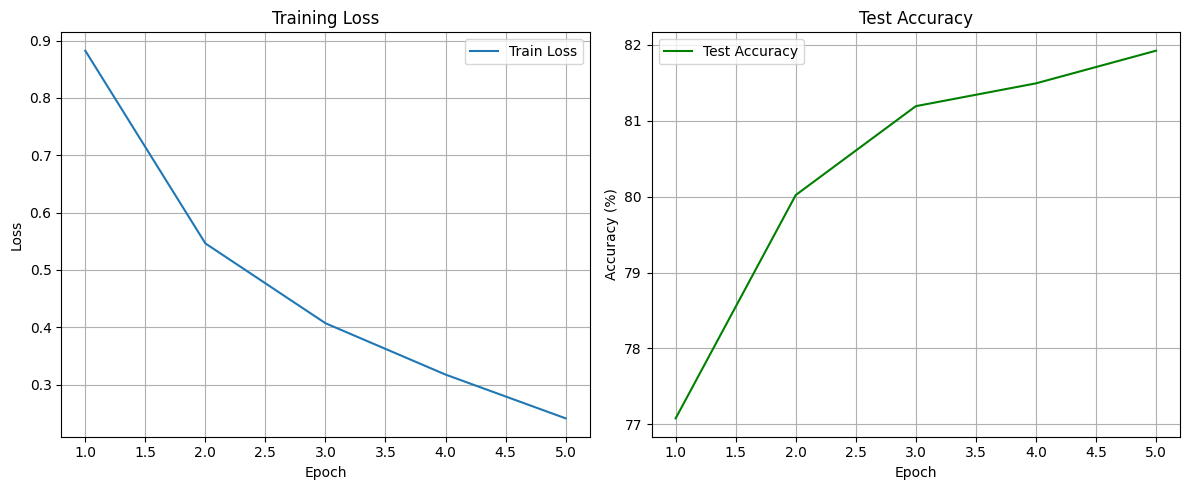

In [4]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

MODEL_DIR = "./model"
os.makedirs(MODEL_DIR, exist_ok=True)

def get_model(model_name="resnet18"):
    model = resnet18(pretrained=True)  
    save_path = os.path.join(MODEL_DIR, f"{model_name}.pth")
    torch.save(model.state_dict(), save_path)
    print(f"{model_name} weights saved to {save_path}")
    return save_path

resnet_path = get_model()

def load_cifar10(batch_size=64):
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

train_loader, test_loader = load_cifar10()

class res18(nn.Module):
    def __init__(self, pretrained_path):
        super(res18, self).__init__()
        self.resnet = resnet18()  
        self.resnet.load_state_dict(torch.load(pretrained_path)) 
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 10)  

    def forward(self, x):
        return self.resnet(x)

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = res18(pretrained_path=resnet_path).to(device)

def train(model, train_loader, test_loader, num_epochs=10, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loss_history = []
    test_acc_history = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_loss_history.append(train_loss)

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                correct += (predicted == targets).sum().item()
                total += targets.size(0)

        test_acc = correct / total * 100
        test_acc_history.append(test_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_loss_history, label="Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), test_acc_history, label="Test Accuracy", color="green")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Test Accuracy")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

train(model, train_loader, test_loader, num_epochs=5, learning_rate=3e-4)